In [1]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from mne.preprocessing import ICA,read_ica

In [2]:
#read the ica file from the folder
sample_data_raw_file=('C:/Users/user/Desktop/ICA/03062019 3_ica.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw_temp=raw.copy().crop(600., 620.) #Copy the raw data and crop the 30 sec data basically skype call
raw_ch = raw_temp.pick_channels(['FC1', ]) # select only one channel

Opening raw data file C:/Users/user/Desktop/ICA/03062019 3_ica.fif...
    Range : 0 ... 260479 =      0.000 ...  2034.992 secs
Ready.
Reading 0 ... 260479  =      0.000 ...  2034.992 secs...


<ipython-input-2-05c89c9e77a4>:3: RuntimeWarning: This filename (C:/Users/user/Desktop/ICA/03062019 3_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)


2561
[[-1.45757758e-05 -1.65586674e-05 -1.23358640e-05 ...  5.39713074e-07
   1.02146694e-06  5.15057334e-07]]


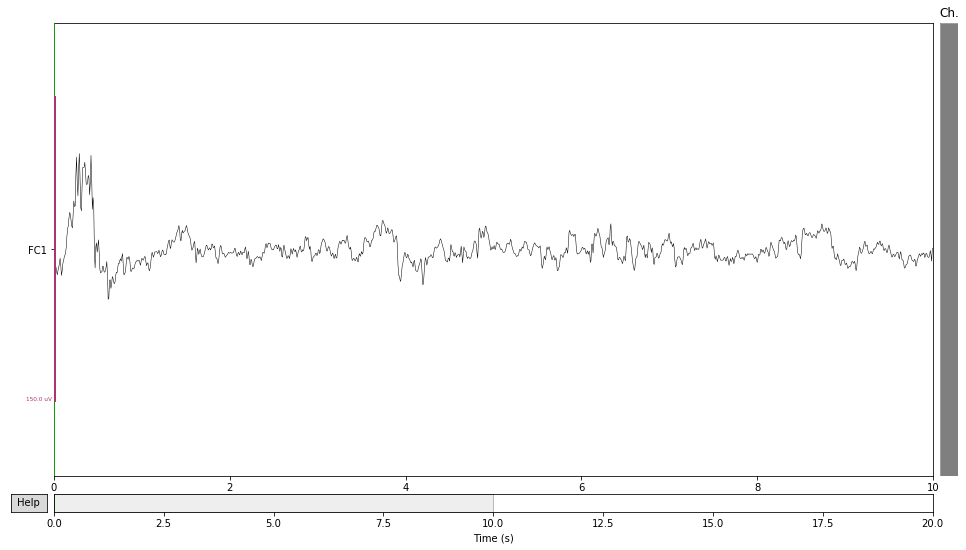

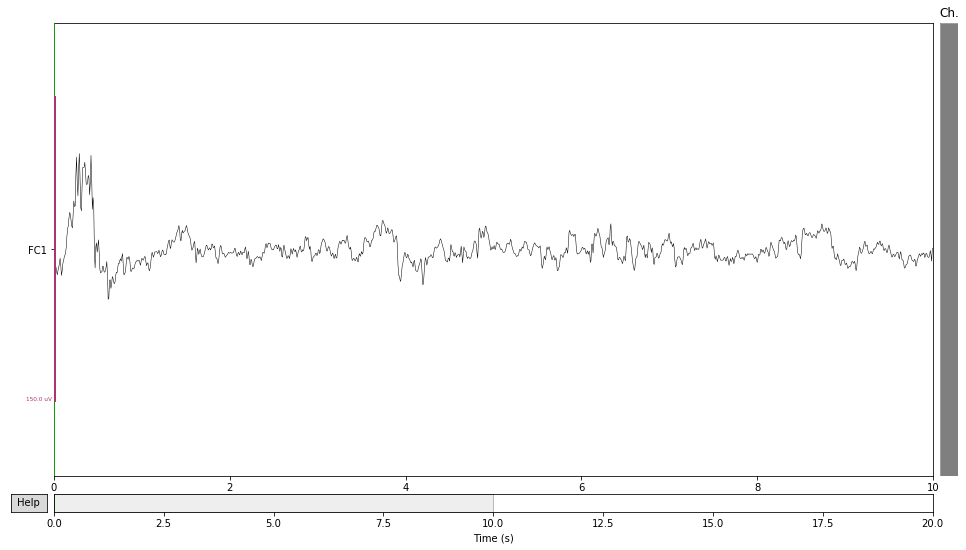

In [3]:
raw_filt=raw_ch.copy()# copy the data
data,times = raw_filt[:]
print(data.size)
print(data)
raw_filt.plot(scalings={"eeg": 75e-6})

In [4]:
from mne.time_frequency import psd_welch
#
def eeg_power_band(data):
    """EEG relative power band feature extraction.

    This function takes an ``mne.Epochs`` object and creates EEG features based
    on relative power in specific frequency bands that are compatible with
    scikit-learn.

    Parameters
    ----------
    epochs : Epochs
        The data.

    Returns
    -------
    X : numpy array of shape [n_samples, 4]
        Transformed data.
    """
    # specific frequency bands
    FREQ_BANDS = {#"delta": [0.5, 4.5],
                  "theta": [4, 8],
                  "alpha": [8, 13],
                  "beta": [13, 30],
                  "gamma": [30, 56]}

    psds, freqs = psd_welch(data, picks='FC1', fmin=4, fmax=56.)
    # Normalize the PSDs
    psds /= np.sum(psds, axis=-1, keepdims=True)

    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:,  (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)    #:,
        X.append(psds_band.reshape(len(psds), -1))

    return np.concatenate(X, axis=1)

In [5]:
eeg_power_band(raw_filt)

Effective window size : 2.000 (s)


array([[0.05961504, 0.02062586, 0.00648586, 0.0018519 ]])

In [6]:
## Discret Wavelet Transform(time-frequency)
import pywt
def DWT( x ):
    resp = pywt.dwt(x, 'db4')
    return resp

data_w,times_w = raw_filt[:]
y=DWT(data_w)
print(y)

(array([[-1.34685347e-05, -1.89413007e-05, -2.11534948e-05, ...,
         1.35291374e-06,  1.02406445e-06,  8.51760031e-07]]), array([[ 9.74328037e-07,  1.28185956e-06, -2.07701869e-06, ...,
         4.23891669e-07,  4.30182863e-07, -1.53490566e-06]]))
